In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch as th
# import torchmetrics as thm
import LPGNN
import igraph as ig
import networkx as nx
import torch_geometric as pyg

import pyarrow as pa
import pyarrow.parquet as pq

import importlib
import powerlaw

import imageio

from tqdm import tqdm

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-09-17 19:33:33.306703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 19:33:33.306727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
importlib.reload(LPGNN.popularity_similarity)
importlib.reload(LPGNN.embedding)
importlib.reload(LPGNN.distances)
importlib.reload(LPGNN.visualization.degree_distribution)
importlib.reload(LPGNN.visualization)
importlib.reload(LPGNN.utils)
importlib.reload(LPGNN.labne)
importlib.reload(LPGNN.graph_metrics)
importlib.reload(LPGNN.DataSetup)
importlib.reload(LPGNN.tree_pruning)
importlib.reload(LPGNN.LinkPrediction)

<module 'LPGNN.LinkPrediction' from '/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/LinkPrediction.py'>

In [64]:
N = 600
avg_k = 8
gamma = 2.7
T = 0.0
seed = 999
PS = LPGNN.popularity_similarity.generatePSNetwork(N, avg_k, gamma, T, seed)

In [61]:
importlib.reload(LPGNN.poincare_embedding)
importlib.reload(LPGNN.lorentz_embedding)

<module 'LPGNN.lorentz_embedding' from '/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/lorentz_embedding.py'>

In [58]:
# PS_Poincare = LPGNN.poincare_embedding.poincare_embedding(PS, epochs=10, dim=2, expm='exact')

In [65]:
PS_Lorentz = LPGNN.lorentz_embedding.lorentz_embedding(PS, epochs=0, dim=3, lr=0.1, expm='exact')

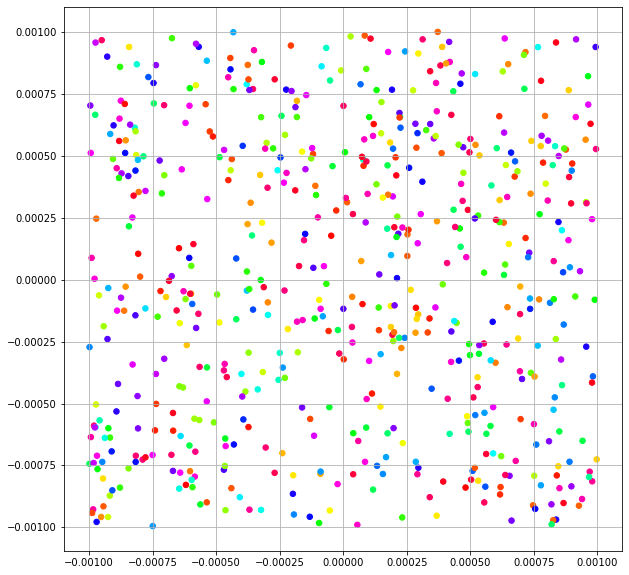

In [66]:
nc = PS.node_positions[:,1].detach().numpy()
x_cart = PS_Lorentz.LorentzEmbedding_node_positions.detach().numpy()
fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
# ax.set_xlim(-1.1, 1.1)
# ax.set_ylim(-1.1, 1.1)
points = ax.scatter(x_cart[:,2], x_cart[:,1], s=30, c=nc, cmap='hsv')

In [67]:
epoch_count = 0
for i in range(50):

    fig.suptitle(f'Epoch = {epoch_count:04}', fontsize=20)
    fig.savefig(f'figs/animations/Lorentz/PS_Lorentz_{i:04}.png')

    # map i to an epoch range that increases by a factor of 2 every 100 i steps, and is capped at 1500
    epoch = min(1500, 2**(i//100))
    epoch_count += epoch
    PS_Lorentz = LPGNN.lorentz_embedding.lorentz_embedding(PS, epochs=epoch, dim=3, lr=0.1, init_pos=PS_Lorentz.LorentzEmbedding_node_positions, expm='exact')
    
    # update the points positions to the new ones
    x_cart = PS_Lorentz.LorentzEmbedding_node_positions[:,1:].detach().numpy()
    points.set_offsets(x_cart)